# Does school funding impact students academic performance?
   
   <img src="images/education-header.png">
   
   **Credit:**  [techxend](https://www.techxtend.com/site/content/education) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
df = pd.read_csv('20210101/final_merged.csv', index_col = 0)
df

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
3120,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,White,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,1.0,2464.90,75.0,75.0,109.0,27.0,27.0,0.0,2.0,2.0,8.0,17.0
7379,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hawaiian Native/Pacific Islander,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,2.0,2431.30,100.0,100.0,110.0,36.0,36.0,0.0,0.0,0.0,2.0,34.0
8,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Black,543.0,1.0,2.0,2403.70,115.0,115.0,157.0,45.0,45.0,0.0,0.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Hawaiian Native/Pacific Islander,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Hispanic,173.0,37.0,1.0,2569.25,329.0,329.0,89.0,84.0,84.0,14.0,28.0,42.0,25.0,17.0
2762,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Hispanic,173.0,37.0,2.0,2508.35,336.0,336.0,89.0,86.0,86.0,2.0,11.0,13.0,26.0,47.0
1070,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Black,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Total Tested At Entity Level',
       'Total Tested with Scores', 'CAASPP Reported Enrollment',
       'Students Tested', 'Total Standard Exceeded', 'Mean Scale Score',
       'Total Standard Met', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Students with Scores',
       'Total Standard Met and Above'],
      dtype='object')

In [4]:
df['Subgroup ID'].unique()

array(['Hispanic', 'Two or More Races',
       'Hawaiian Native/Pacific Islander', 'Asian or Pacific Islander',
       'White', 'Filipino', 'American Indian/Alaska Native', 'Black'],
      dtype=object)

In [5]:
# Step 1: create list of the ethiniticies of interest
list1 = ['White', 'Black', 'Hispanic']

# Step 2: filter based on the list above
df = df[df['Subgroup ID'].isin(list1)]
df.head(5)

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Students with Scores,Total Standard Met and Above
1799,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,1.0,75.0,75.0,109.0,27.0,0.0,2464.9,2.0,8.0,17.0,27.0,2.0
1800,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,2.0,100.0,100.0,110.0,36.0,0.0,2431.3,0.0,2.0,34.0,36.0,0.0
3797,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,White,209.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3796,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,White,209.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Black,543.0,1.0,1.0,105.0,105.0,157.0,41.0,0.0,2419.6,0.0,6.0,35.0,41.0,0.0


In [6]:
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

In [7]:
# dataset containing only districts called office of education:

OFFICE_OF_EDUCATION = df[df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]
print(OFFICE_OF_EDUCATION.shape)

# filter office of education out of the main dataset
df = df[~df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]
df = df[~df['Agency Name'].str.contains('SBE - AUDEO CHARTER')]

df.head(6)

(214, 20)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Students with Scores,Total Standard Met and Above
3021,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Hispanic,3858.0,30.0,2.0,6272.0,6272.0,2059.0,1559.0,21.0,14446.3,48.0,112.0,1378.0,1559.0,69.0
1101,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Black,125.0,30.0,2.0,264.0,264.0,72.0,51.0,1.0,2388.5,0.0,4.0,46.0,51.0,1.0
3020,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Hispanic,3858.0,30.0,1.0,6344.0,6344.0,2053.0,1577.0,45.0,14547.4,136.0,300.0,1096.0,1577.0,181.0
5024,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,White,1527.0,30.0,1.0,1848.0,1848.0,778.0,443.0,71.0,12645.2,132.0,104.0,136.0,443.0,203.0
1100,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Black,125.0,30.0,1.0,272.0,272.0,72.0,53.0,3.0,2452.1,0.0,13.0,37.0,53.0,3.0
5025,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,White,1527.0,30.0,2.0,1832.0,1832.0,782.0,438.0,29.0,12535.2,82.0,72.0,255.0,438.0,111.0


In [8]:
df['Total Enrollment'].describe()

count      4542.000000
mean       8049.772347
std       25258.510701
min         251.000000
25%        1064.000000
50%        3211.000000
75%        9104.000000
max      633621.000000
Name: Total Enrollment, dtype: float64

In [9]:
df_high_funding = df[(df['Revenue per student'] > 22_000)]
df = df[~(df['Revenue per student'] > 22_000)]
df = df[~(df['Revenue per student'] == 0)]
print(df_high_funding.shape)

df_high_funding

(42, 20)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Students with Scores,Total Standard Met and Above
3021,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Hispanic,3858.0,30.0,2.0,6272.0,6272.0,2059.0,1559.0,21.0,14446.3,48.0,112.0,1378.0,1559.0,69.0
1101,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Black,125.0,30.0,2.0,264.0,264.0,72.0,51.0,1.0,2388.5,0.0,4.0,46.0,51.0,1.0
3020,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Hispanic,3858.0,30.0,1.0,6344.0,6344.0,2053.0,1577.0,45.0,14547.4,136.0,300.0,1096.0,1577.0,181.0
5024,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,White,1527.0,30.0,1.0,1848.0,1848.0,778.0,443.0,71.0,12645.2,132.0,104.0,136.0,443.0,203.0
1100,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,Black,125.0,30.0,1.0,272.0,272.0,72.0,53.0,3.0,2452.1,0.0,13.0,37.0,53.0,3.0
5025,10306,ORANGE COUNTY DEPARTMENT OF EDUCATION,6233.0,306354000.0,49150.33,White,1527.0,30.0,2.0,1832.0,1832.0,782.0,438.0,29.0,12535.2,82.0,72.0,255.0,438.0,111.0
2014,61663,BYRON UNION ELEMENTARY,2234.0,57951000.0,25940.47,Hispanic,527.0,7.0,1.0,1624.0,1624.0,464.0,464.0,72.0,14907.4,112.0,122.0,158.0,464.0,184.0
192,61663,BYRON UNION ELEMENTARY,2234.0,57951000.0,25940.47,Black,92.0,7.0,1.0,406.0,406.0,87.0,85.0,11.0,4809.8,14.0,24.0,36.0,85.0,25.0
193,61663,BYRON UNION ELEMENTARY,2234.0,57951000.0,25940.47,Black,92.0,7.0,2.0,406.0,406.0,87.0,85.0,15.0,4838.9,16.0,20.0,34.0,85.0,31.0
2015,61663,BYRON UNION ELEMENTARY,2234.0,57951000.0,25940.47,Hispanic,527.0,7.0,2.0,1624.0,1617.0,464.0,464.0,94.0,14995.1,98.0,126.0,144.0,462.0,192.0


--------------------

# DATASET TEST ID 1

In [10]:
# Filter based on TEST ID1
list = ['1.0']
test_Id1 = df[df['Test Id'].isin(list)]
test_ID1 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested',
              'Total Tested with Scores'], axis=1)
test_ID1.head(5)

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Students with Scores
1801,61119,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Hispanic,1897.0,1540.0,310.0,17629.9,458.0,386.0,334.0,1488.0
12,61119,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Black,924.0,726.0,86.0,17290.9,148.0,134.0,318.0,686.0
3798,61119,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,White,3292.0,2768.0,1142.0,18021.3,852.0,378.0,284.0,2656.0
1803,61127,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.20,Hispanic,603.0,662.0,164.0,17843.2,248.0,122.0,88.0,622.0
14,61127,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.20,Black,117.0,55.0,7.0,0.0,29.0,9.0,8.0,53.0


## Large districts: above 100,000 total enrollment

In [11]:
large_districts_ID1 = test_ID1[test_ID1['Total Enrollment'] >= 100_000]
print(large_districts_ID1.shape)

large_districts_ID1 = large_districts_ID1.drop(['District Code', 'Total Enrollment', 
                                                'Total Revenue', 'Students with Scores'], axis=1)

large_districts_ID1

(6, 14)


,Agency Name,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
844,LOS ANGELES UNIFIED,13322.19,Black,52837.0,43602.0,3839.0,17235.3,8448.0,9471.0,19853.0
4741,LOS ANGELES UNIFIED,13322.19,White,63828.0,56148.0,18933.0,17862.2,16853.0,9644.0,8685.0
2738,LOS ANGELES UNIFIED,13322.19,Hispanic,468734.0,395558.0,37842.0,17343.7,91326.0,99762.0,154788.0
5303,SAN DIEGO UNIFIED,7262.97,White,29347.0,25662.0,10644.0,18050.6,8157.0,3513.0,2188.0
3299,SAN DIEGO UNIFIED,7262.97,Hispanic,59806.0,48788.0,6644.0,17440.6,12222.0,11622.0,16339.0
1348,SAN DIEGO UNIFIED,7262.97,Black,11087.0,8672.0,1026.0,17373.5,1965.0,1935.0,3096.0


## Medium districts: between 50,000 and 100,000 total enrollment

In [12]:
medium_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 100_000) & (test_ID1['Total Enrollment'] >= 50_000)]
print(medium_districts_ID1.shape)

medium_districts_ID1 = medium_districts_ID1.drop(['District Code', 'Total Enrollment', 
                                                'Total Revenue', 'Students with Scores'], axis=1)

medium_districts_ID1.head(5)

(24, 14)


,Agency Name,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
2371,FRESNO UNIFIED,12683.73,Hispanic,49722.0,51502.0,4281.0,17275.8,11179.0,12783.0,21911.0
4369,FRESNO UNIFIED,12683.73,White,7298.0,7126.0,1638.0,17640.2,1955.0,1370.0,1881.0
514,FRESNO UNIFIED,12683.73,Black,6224.0,6258.0,291.0,17067.2,957.0,1368.0,3396.0
2728,LONG BEACH UNIFIED,11970.57,Hispanic,43148.0,44862.0,5760.0,17461.7,11904.0,11922.0,14285.0
4731,LONG BEACH UNIFIED,11970.57,White,10090.0,10500.0,4295.0,18013.0,3391.0,1484.0,1096.0


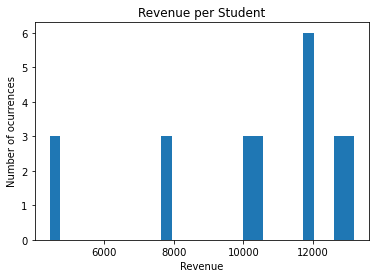

In [13]:
_ = plt.hist(medium_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

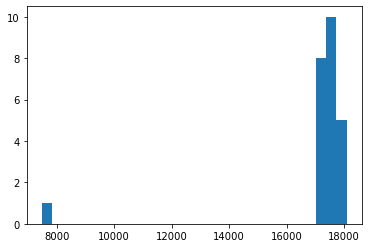

In [14]:
medium_districts_ID1 = medium_districts_ID1[~(medium_districts_ID1['Mean Scale Score'] < 5000)]
_ = plt.hist(medium_districts_ID1['Mean Scale Score'], density=False, bins=30)

<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

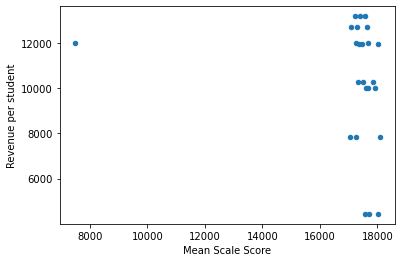

In [15]:
scatterplot1 = medium_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Mean Scale Score', y='Revenue per student')

## Small districts: between 10,000 and 50,000 total enrollment

In [16]:
small_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 50_000) & (test_ID1['Total Enrollment'] >= 10_000)]
print(small_districts_ID1.shape)

small_districts_ID1 = small_districts_ID1.drop(['District Code', 'Total Enrollment', 
                                                'Total Revenue', 'Students with Scores'], axis=1)

small_districts_ID1.head(5)

(471, 14)


,Agency Name,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1801,ALAMEDA UNIFIED,8660.45,Hispanic,1897.0,1540.0,310.0,17629.9,458.0,386.0,334.0
12,ALAMEDA UNIFIED,8660.45,Black,924.0,726.0,86.0,17290.9,148.0,134.0,318.0
3798,ALAMEDA UNIFIED,8660.45,White,3292.0,2768.0,1142.0,18021.3,852.0,378.0,284.0
3915,BERKELEY UNIFIED,11999.51,White,3868.0,4064.0,1889.0,18142.2,1158.0,425.0,232.0
1919,BERKELEY UNIFIED,11999.51,Hispanic,2473.0,2264.0,359.0,17507.6,568.0,535.0,659.0


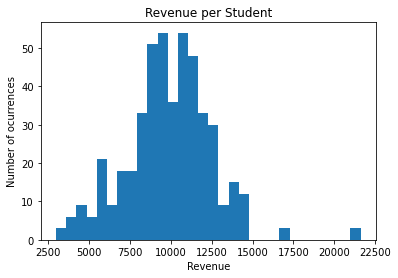

In [17]:
_ = plt.hist(small_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")


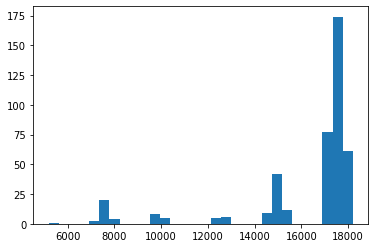

In [18]:
small_districts_ID1 = small_districts_ID1[~(small_districts_ID1['Mean Scale Score'] < 5000)]
_ = plt.hist(small_districts_ID1['Mean Scale Score'], density=False, bins=30)

<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

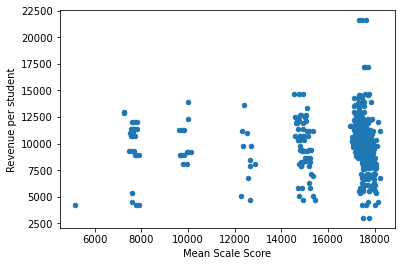

In [19]:
scatterplot = small_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Mean Scale Score', y='Revenue per student')

In [20]:
# Reshaping the dataset
#table = small_districts_ID1[['Revenue per student', 'Subgroup ID', 'Mean Scale Score']]

# pivot the table to add a column for each Indicator code
#table = pd.pivot_table(small_districts_ID1, index='Revenue per student', columns='Subgroup ID', values='Mean Scale Score')

# Plot distribution of the four main pollutants across the globe from 1960 to 2010
#table.plot.scatter(x='Black', y='Revenue per student')


In [21]:
#table

## Smaller districts: between 10,000 and 5,000 total enrollment

In [22]:
smaller_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 10_000) & (test_ID1['Total Enrollment'] >= 5_000)]
print(smaller_districts_ID1.shape)

smaller_districts_ID1 = smaller_districts_ID1.drop(['District Code', 'Total Enrollment', 
                                                'Total Revenue', 'Students with Scores'], axis=1)

smaller_districts_ID1.head(5)

(320, 14)


,Agency Name,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
2064,CASTRO VALLEY UNIFIED,12562.58,Hispanic,2239.0,2356.0,419.0,17623.4,744.0,624.0,531.0
236,CASTRO VALLEY UNIFIED,12562.58,Black,532.0,578.0,92.0,17539.9,129.0,176.0,145.0
4061,CASTRO VALLEY UNIFIED,12562.58,White,2689.0,2906.0,930.0,17918.2,1030.0,550.0,328.0
1042,NEWARK UNIFIED,8968.96,Black,236.0,253.0,20.0,14843.0,64.0,51.0,108.0
2959,NEWARK UNIFIED,8968.96,Hispanic,3146.0,3402.0,306.0,17375.6,872.0,910.0,1200.0


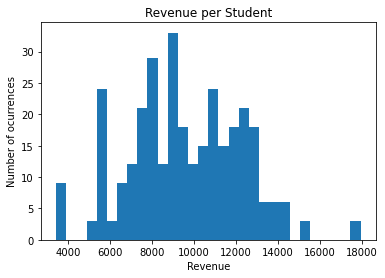

In [23]:
_ = plt.hist(smaller_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

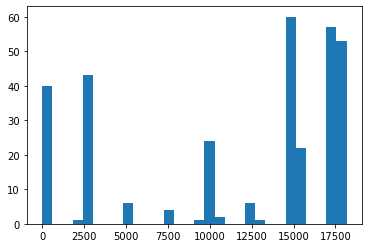

In [24]:
_ = plt.hist(smaller_districts_ID1['Mean Scale Score'], density=False, bins=30)

<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

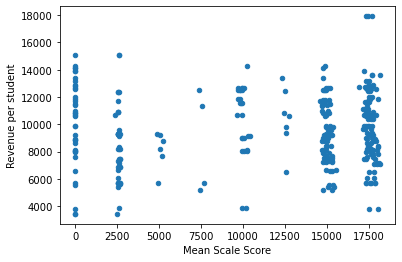

In [25]:
scatterplot = smaller_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Mean Scale Score', y='Revenue per student')

## Tiny districts: between 5,000 and 1,000 total enrollment

In [26]:
tiny_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 5_000) & (test_ID1['Total Enrollment'] >= 1000)]
print(tiny_districts_ID1.shape)

tiny_districts_ID1 = tiny_districts_ID1.drop(['District Code', 'Total Enrollment', 
                                                'Total Revenue', 'Students with Scores'], axis=1)

tiny_districts_ID1.head(5)

(858, 14)


,Agency Name,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1803,ALBANY CITY UNIFIED,15724.20,Hispanic,603.0,662.0,164.0,17843.2,248.0,122.0,88.0
14,ALBANY CITY UNIFIED,15724.20,Black,117.0,55.0,7.0,0.0,29.0,9.0,8.0
3800,ALBANY CITY UNIFIED,15724.20,White,1368.0,1548.0,786.0,18196.4,476.0,150.0,78.0
3103,PIEDMONT CITY UNIFIED,12042.35,Hispanic,207.0,235.0,102.0,15368.5,73.0,35.0,20.0
5107,PIEDMONT CITY UNIFIED,12042.35,White,1611.0,1868.0,984.0,18235.0,612.0,176.0,50.0


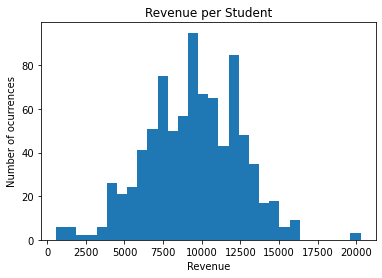

In [27]:
_ = plt.hist(tiny_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

## Mini districts: total enrollment less than 1,000

In [28]:
mini_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 1000)]
print(mini_districts_ID1.shape)

mini_districts_ID1 = mini_districts_ID1.drop(['District Code', 'Total Enrollment', 
                                                'Total Revenue', 'Students with Scores'], axis=1)

mini_districts_ID1.head(5)

(479, 14)


,Agency Name,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
4279,EMERY UNIFIED,20601.16,White,76.0,41.0,6.0,0.0,11.0,5.0,17.0
432,EMERY UNIFIED,20601.16,Black,357.0,350.0,8.0,17061.2,46.0,92.0,184.0
2282,EMERY UNIFIED,20601.16,Hispanic,138.0,158.0,17.0,12374.0,28.0,47.0,56.0
1939,BIGGS UNIFIED,9833.06,Hispanic,231.0,259.0,10.0,14657.3,34.0,69.0,123.0
131,BIGGS UNIFIED,9833.06,Black,13.0,0.0,0.0,0.0,0.0,0.0,0.0


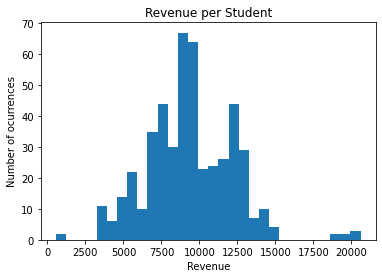

In [29]:
_ = plt.hist(mini_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

---------------

# DATASET TEST ID 2

In [30]:
# Filter based on TEST ID1
list = ['2.0']
test_Id2 = df[df['Test Id'].isin(list)]
test_ID2 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested',
              'Total Tested with Scores'], axis=1)
test_ID2.head(5)

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,CAASPP Reported Enrollment,Total Standard Exceeded,Mean Scale Score,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Students with Scores
1801,61119,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Hispanic,1897.0,1540.0,310.0,17629.9,458.0,386.0,334.0,1488.0
12,61119,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Black,924.0,726.0,86.0,17290.9,148.0,134.0,318.0,686.0
3798,61119,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,White,3292.0,2768.0,1142.0,18021.3,852.0,378.0,284.0,2656.0
1803,61127,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.20,Hispanic,603.0,662.0,164.0,17843.2,248.0,122.0,88.0,622.0
14,61127,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.20,Black,117.0,55.0,7.0,0.0,29.0,9.0,8.0,53.0
